In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
import os
import glob
import random
from skimage.feature import hog
from skimage import exposure
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

C:\Users\yasha\AppData\Local\Temp\ipykernel_17956\3570686943.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_train=pd.read_csv('keypoints_train(all).csv')
df_test=pd.read_csv('keypoints_test.csv')

In [3]:
label_encoder = LabelEncoder()
df_train['label'] = label_encoder.fit_transform(df_train['label'])
df_test['label'] = label_encoder.transform(df_test['label'])

encoded_labels_train = df_train['label'].values
original_labels_train = label_encoder.inverse_transform(encoded_labels_train)

encoded_labels_test = df_test['label'].values
original_labels_test = label_encoder.inverse_transform(encoded_labels_test)

In [4]:
y_train = df_train['label']
X_train = df_train.drop(columns=['label'])

In [5]:
y_test = df_test['label']
X_test = df_test.drop(columns=['label'])

In [6]:
svm = SVC(kernel='rbf', C=50, gamma=0.1, decision_function_shape='ovo',degree=1)
svm.fit(X_train, y_train)

SVC(C=50, decision_function_shape='ovo', degree=1, gamma=0.1)

In [7]:
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {svm_accuracy * 100:.2f}%")

SVM Test Accuracy: 99.98%


In [9]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

SVM Classification Report:
              precision    recall  f1-score   support

         cha       1.00      1.00      1.00       300
        chha       1.00      1.00      1.00       300
          da       1.00      1.00      1.00       300
         dda       1.00      1.00      1.00       300
        ddha       1.00      1.00      1.00       300
         dha       1.00      1.00      1.00       300
          ga       1.00      1.00      1.00       300
         gha       1.00      1.00      1.00       300
          ja       1.00      1.00      1.00       300
         jha       1.00      1.00      1.00       300
          ka       1.00      1.00      1.00       300
         kha       1.00      1.00      1.00       300
         na1       1.00      1.00      1.00       300
         na2       1.00      1.00      1.00       300
         na3       1.00      1.00      1.00       300
         na4       1.00      1.00      1.00       299
          ta       1.00      1.00      1.00       300


SVM Confusion Matrix:


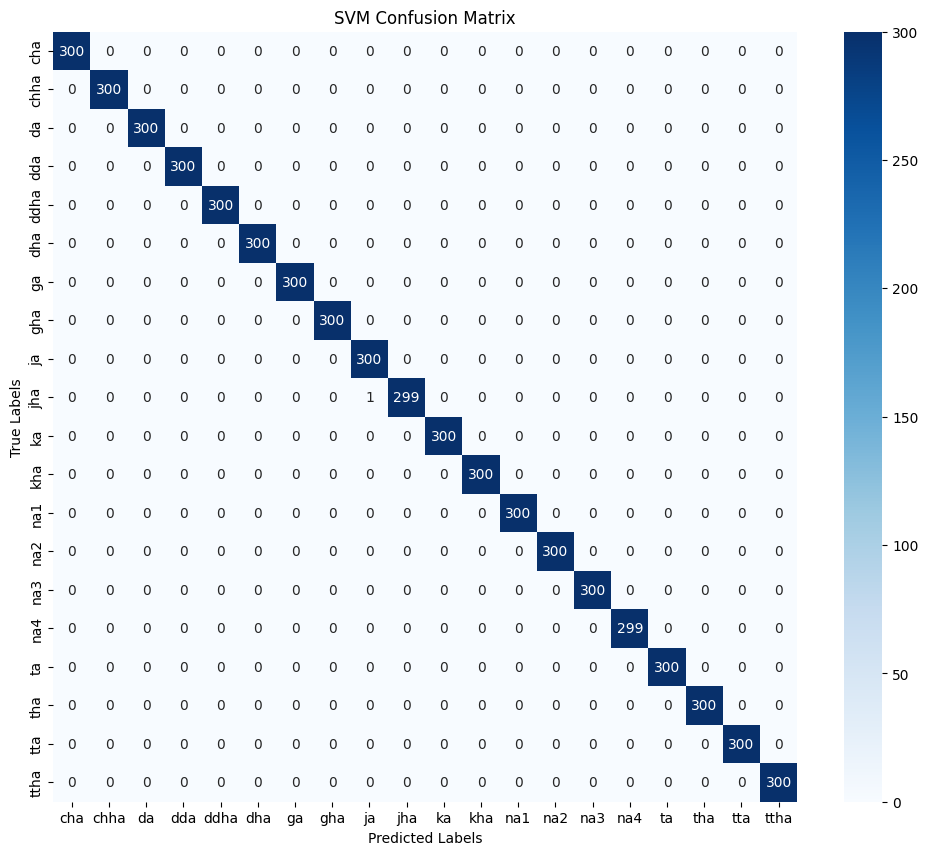

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
print("SVM Confusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()